### Graphical Representations of Data

In [28]:
# Import our libraries

# This is for numerical processing
import numpy as np
# This is the library most commonly used for plotting in Python.
# Notice how we import it 'as' plt, this enables us to type plt
# rather than the full string every time.
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme()

plt.rcParams['lines.markersize'] = 1

import yfinance as yf

In [16]:
# Data Structure
start = '2014-01-01'
end = '2015-01-01'
data = yf.download(['AAPL', 'MSFT'], start=start, end=end)['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [17]:
data.head()

,AAPL,MSFT
Date,,
2014-01-02,17.318729,31.290821
2014-01-03,16.938318,31.080303
2014-01-06,17.030674,30.423502
2014-01-07,16.908875,30.659269
2014-01-08,17.015957,30.111944


In [18]:
# We are gonna index the DataFrame getting a 1D series object. 
data['MSFT'].head()

Date
2014-01-02    31.290821
2014-01-03    31.080303
2014-01-06    30.423502
2014-01-07    30.659269
2014-01-08    30.111944
Name: MSFT, dtype: float64

### Histogram

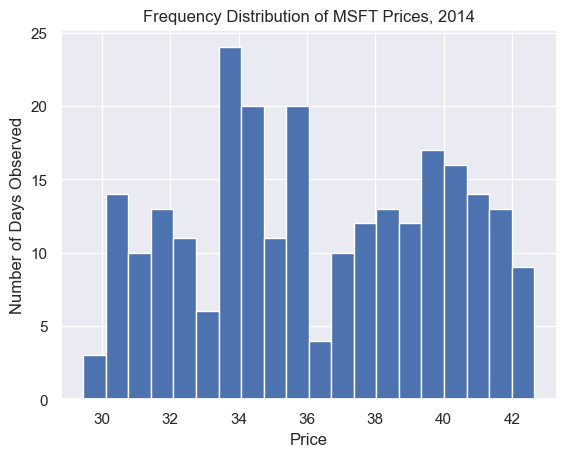

In [22]:
plt.hist(data['MSFT'], bins=20)
plt.xlabel('Price')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of MSFT Prices, 2014');

### Returns Histogram
In finance rarely will we look at the distribution of prices. The reason for this is that prices are non-stationary and move around a lot. Instead we will use daily returns.

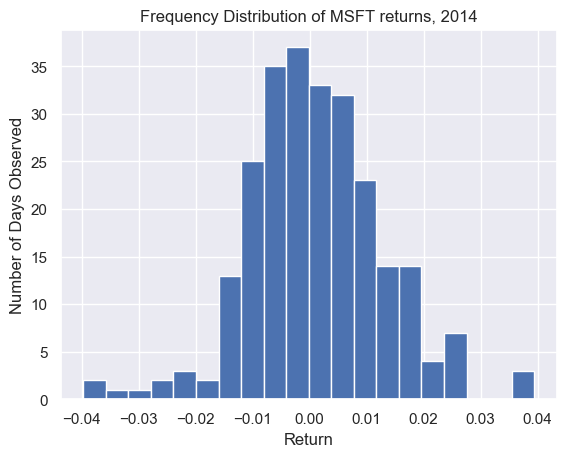

In [21]:
# Remove the first element because percent change from nothing to something is NaN
R = data['MSFT'].pct_change()[1:]

plt.hist(R, bins=20)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of MSFT returns, 2014');

The graph above shows, for example, that the daily returns of MSFT were above 0.3 on fewer than 5 days in 2014. Note that we are completely discarding the dates corresponding to these returns.

### Cumulative Histogram (Discrete Estimated CDF)

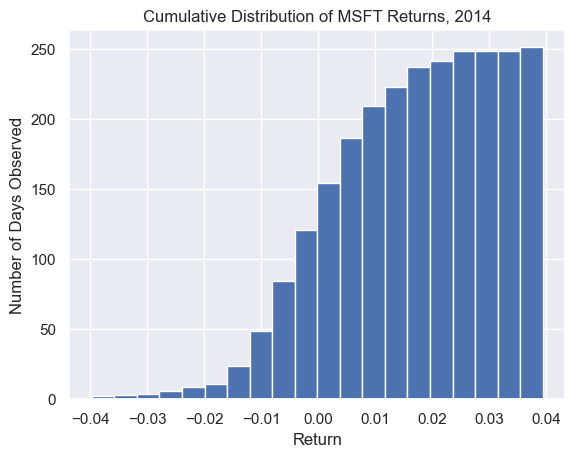

In [23]:
# Remove the first element because percent change from nothing to something is NaN
R = data['MSFT'].pct_change()[1:]

# Plot a histogram using 20 bins
plt.hist(R, bins=20, cumulative=True)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Cumulative Distribution of MSFT Returns, 2014');

### Scatter plot
A scatter plot is useful for visualizing the relationship between two data sets. We use two data sets which have some sort of correspondence, such as the date on which the measurement was taken. Each point represents two corresponding values from the two data sets. However, we don't plot the date that the measurement were taken on.

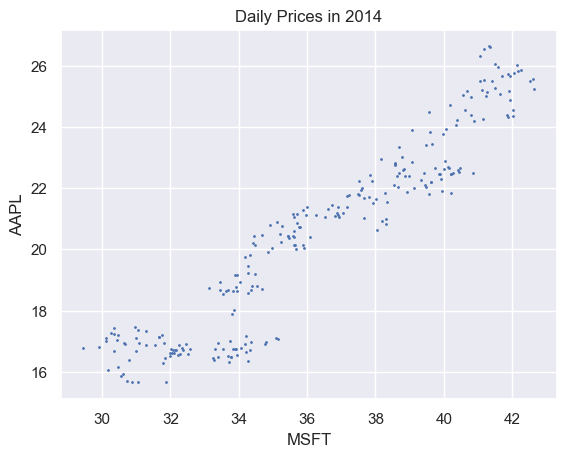

In [29]:
plt.scatter(data['MSFT'], data['AAPL'])
plt.xlabel('MSFT')
plt.ylabel('AAPL')
plt.title('Daily Prices in 2014');

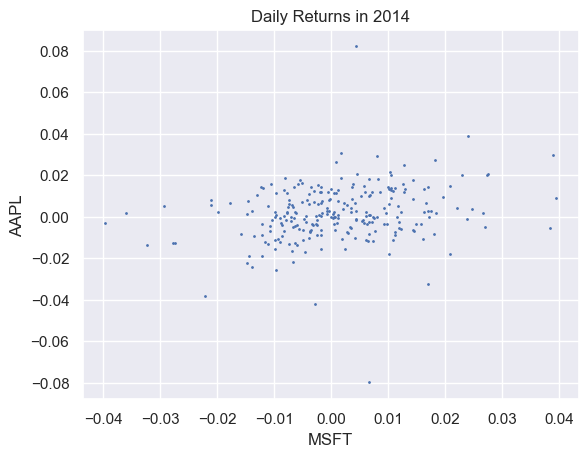

In [30]:
R_msft = data['MSFT'].pct_change()[1:]
R_aapl = data['AAPL'].pct_change()[1:]

plt.scatter(R_msft, R_aapl)
plt.xlabel('MSFT')
plt.ylabel('AAPL')
plt.title('Daily Returns in 2014');

### Line graph

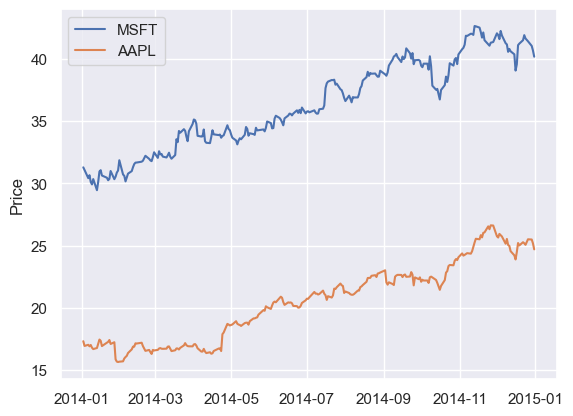

In [31]:
plt.plot(data['MSFT'])
plt.plot(data['AAPL'])
plt.ylabel('Price')
plt.legend(['MSFT', 'AAPL']);

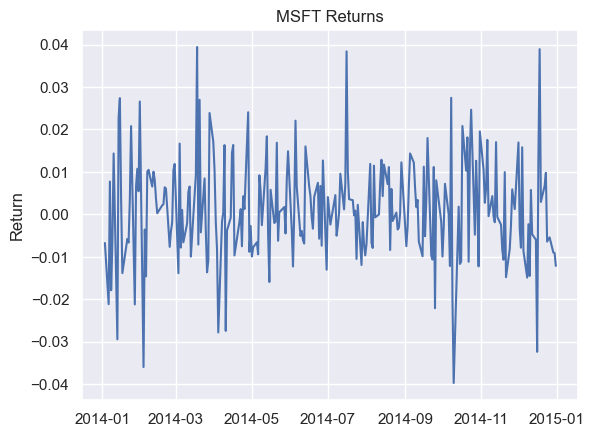

In [32]:
# Remove the first element because percent change from nothing to something is NaN
R = data['MSFT'].pct_change()[1:]

plt.plot(R)
plt.ylabel('Return')
plt.title('MSFT Returns');

### Never Assume Conditions Hold
Again, whenever using plots to visualize data, do not assume you can test a hypothesis by looking at a graph. Also do not assume that because a distribution or trend used to be true, it is still true. In general much more sophisticated and careful validation is required to test whether models hold. Plots are mainly useful when initially deciding how your models should work.